<a href="https://colab.research.google.com/github/dutta-arka/Resonance-Capture-of-Planets/blob/main/RTP%3B%20Semi_major_axis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import all the required packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv("E3.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   2MASS J19383260+4603591 b  1102 non-null   object 
 1   2MASS J19383260+4603591    1102 non-null   object 
 2   Unnamed: 2                 841 non-null    float64
dtypes: float64(1), object(2)
memory usage: 26.0+ KB


In [3]:
# Group the DataFrame by the names in column 2
grouped = df.groupby(df.iloc[:, 1])

# Initialize an empty list to store dictionaries
output = []

# Initialize a counter
counter = 1

# Iterate over each group
for name, group in grouped:
    # Create a dictionary for the current group
    d = {}
    for index, row in group.iterrows():
        # Extract the key from column 1 and value from column 3
        key = row.iloc[0][-1]  # Extract the last character from the string in column 1
        value = row.iloc[2]
        # Check if the value is not NaN
        if not np.isnan(value):
            d[key] = value
    # Append the dictionary to the output list
    if d:
      output.append({'No.': counter, 'Host Names': name, 'Semi-major axis (in au)': d})
      counter += 1

# Convert the list of dictionaries to a DataFrame
odf = pd.DataFrame(output)

# Print the output as a table
print(odf.to_string(index=False))

 No.     Host Names                                                                           Semi-major axis (in au)
   1         47 UMa                                                                   {'b': 2.1, 'c': 3.6, 'd': 11.6}
   2         55 Cnc                                 {'b': 0.1134, 'c': 0.2373, 'd': 5.957, 'e': 0.01544, 'f': 0.7708}
   3         61 Vir                                                          {'b': 0.050201, 'c': 0.2175, 'd': 0.476}
   4         AU Mic                                                                        {'b': 0.0645, 'c': 0.1101}
   5        CoRoT-7                                                                                      {'c': 0.046}
   6         DMPP-1                                              {'b': 0.1462, 'c': 0.0733, 'd': 0.0422, 'e': 0.0651}
   7 EPIC 249893012                                                                {'b': 0.047, 'c': 0.13, 'd': 0.22}
   8        GJ 1061                                     

In [4]:
results = []
err = 0.05

for index, row in odf.iterrows():
    host_name = row['Host Names']
    sma = row['Semi-major axis (in au)']

    ratios = set()  # Use a set to avoid duplicates
    for i in range(len(sma)):
        for j in range(i + 1, len(sma)):
            # Calculate all possible ratios with denominators from 1 to 9
            for denominator in range(1, 10):
                try:
                    ratio = sma[list(sma.keys())[j]] / (
                        denominator * sma[list(sma.keys())[i]]
                    )
                    # Check if the ratio is close to an integer
                    rounded_ratio = round(ratio)
                    if abs(ratio - rounded_ratio) <= err and (rounded_ratio != 0 and denominator != 0):
                        # Simplify the ratio if possible
                        gcd = abs(math.gcd(int(rounded_ratio), denominator))

                        # Ensure a > b in the simplified ratio
                        numerator = int(rounded_ratio // gcd)
                        denominator = denominator // gcd
                        if numerator < denominator:
                            numerator, denominator = denominator, numerator

                        simplified_ratio = f"{numerator}:{denominator}"
                        ratios.add(simplified_ratio)
                except ZeroDivisionError:
                    pass  # Handle potential zero division errors

    if ratios:
        results.append({'No.': index + 1, 'Host Names': host_name, 'Orbital Period Values': sma, 'Ratios': list(ratios)})

# Create a DataFrame from the results
rdf = pd.DataFrame(results)

print(rdf.to_string(index=False))

 No.  Host Names                                                                             Orbital Period Values                                         Ratios
   2      55 Cnc                                 {'b': 0.1134, 'c': 0.2373, 'd': 5.957, 'e': 0.01544, 'f': 0.7708}                          [1:1, 25:2, 7:1, 2:1]
   9      GJ 163                                                           {'b': 0.0607, 'c': 0.1254, 'd': 1.0304}                               [8:1, 17:1, 2:1]
  11     GJ 3138                                                             {'b': 0.0197, 'c': 0.057, 'd': 0.698}                                          [3:1]
  15      GJ 433                                                              {'b': 0.062, 'c': 4.819, 'd': 0.178}                                    [13:6, 3:1]
  19      GJ 876                                         {'b': 0.208317, 'c': 0.12959, 'd': 0.020807, 'e': 0.3343}                                     [1:1, 4:1]
  20     GJ 9827            

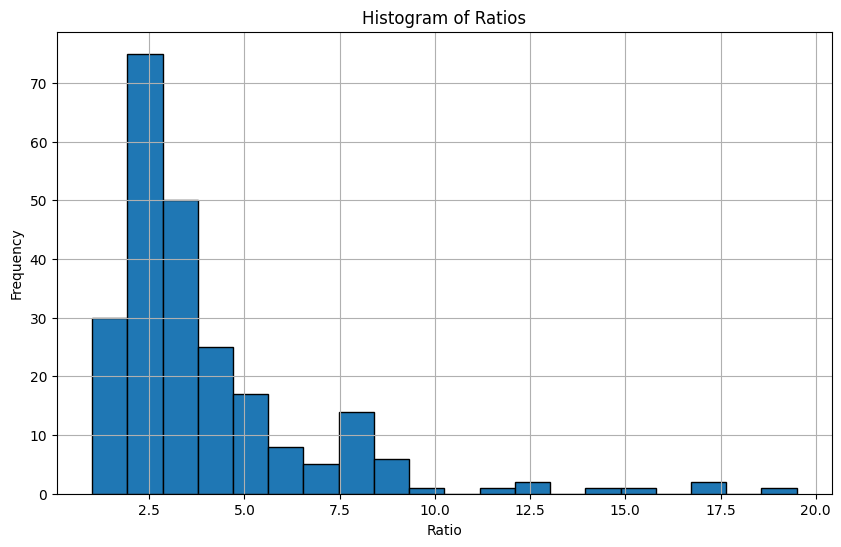

In [5]:
# Extract all ratios from the DataFrame and evaluate them
all_ratios = []
for ratios in rdf['Ratios']:
    for ratio in ratios:
        numerator, denominator = map(int, ratio.split(':'))
        ratio_value = numerator / denominator
        if ratio_value <= 20:  # Filter out values bigger than 20
            all_ratios.append(ratio_value)

ideal_bins = 20

# Plot the histogram with the ideal bin number
plt.figure(figsize=(10, 6))
plt.hist(all_ratios, bins=ideal_bins, edgecolor='black')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Histogram of Ratios')
plt.grid(True)
plt.show()

Histogram data saved to: sem-maj.txt


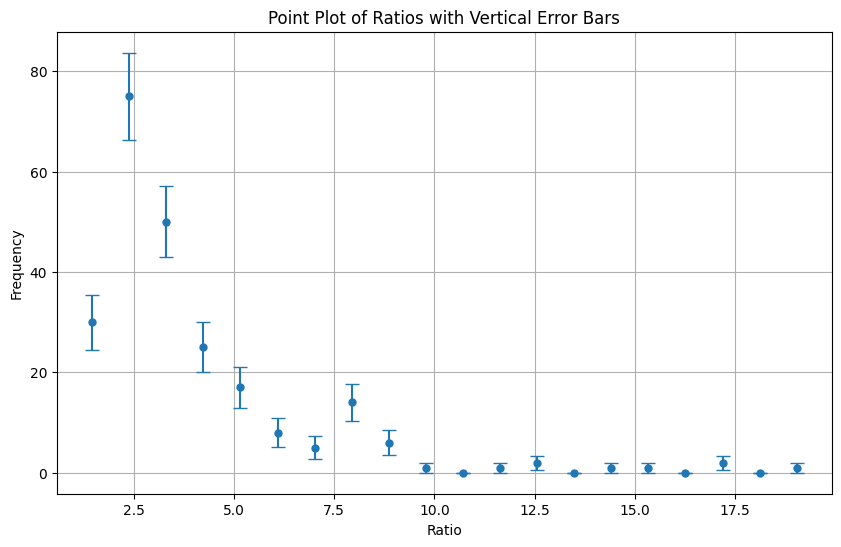

In [6]:
# Calculate the histogram
hist_values, bin_edges = np.histogram(all_ratios, bins=ideal_bins)

# Calculate the centers of the histogram bins
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Calculate the standard deviation associated with each bin
bin_std_dev = np.sqrt(hist_values)

# Save data to a text file (modify filename as needed)
filename = "sem-maj.txt"
with open(filename, 'w') as f:
  # Save header row (optional)
  f.write("Bin Centers, Frequencies\n")

  # Save data in comma-separated format (CSV)
  for center, value in zip(bin_centers, hist_values):
    f.write(f"{center:.4f},{value:.0f}\n")

print(f"Histogram data saved to: {filename}")

# Plot the point plot with vertical error bars
plt.figure(figsize=(10, 6))
plt.errorbar(bin_centers, hist_values, yerr=bin_std_dev, fmt='o', markersize=5, capsize=5)
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.title('Point Plot of Ratios with Vertical Error Bars')
plt.grid(True)
plt.show()